In [4]:
!pip install mlcrate

    100% |################################| 163kB 9.3MB/s ta 0:00:01
    100% |################################| 61kB 8.7MB/s ta 0:00:011
    100% |################################| 153kB 10.1MB/s a 0:00:01
    100% |################################| 112kB 11.4MB/s ta 0:00:01
    100% |################################| 1.4MB 5.5MB/s ta 0:00:011
  Running setup.py bdist_wheel for pathos ... done
  Stored in directory: /home/deeplearn/.cache/pip/wheels/12/6b/3f/c9d2272bcd06caaf166988b27f72b7b08ab34ef211c8cbc4db
  Running setup.py bdist_wheel for ppft ... done
  Stored in directory: /home/deeplearn/.cache/pip/wheels/6f/25/0d/a2099d51db6f2a7c6019599bd3b62795da3bf76a6a4eb0e615
  Running setup.py bdist_wheel for dill ... done
  Stored in directory: /home/deeplearn/.cache/pip/wheels/e2/5d/17/f87cb7751896ac629b435a8696f83ee75b11029f5d6f6bda72
  Running setup.py bdist_wheel for pox ... done
  Stored in directory: /home/deeplearn/.cache/pip/wheels/16/f0/d1/d618f2d966cb9b219a87ef3eca40e369ef51462

In [8]:
import numpy as np
import pandas as pd
import mlcrate as mlc
from skimage.io import imread, imsave
from skimage.transform import resize

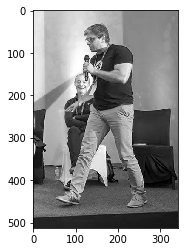

In [34]:
# Download and display our image
from urllib import request
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline
# url = 'https://tarrysingh.com/wp-content/uploads/2008/12/AAEAAQAAAAAAAAdTAAAAJDdjMzE0NjQyLWQ1MDQtNGEyOC05NzgwLTFlNjVkNWM1YTE4MQ.jpg'
# data = BytesIO(request.urlopen(url).read())
image = imread('input/tarry2.jpg', format='jpg')

plt.imshow(image)
img = image[:, :, 0]
plt.imshow(img, cmap='gray')

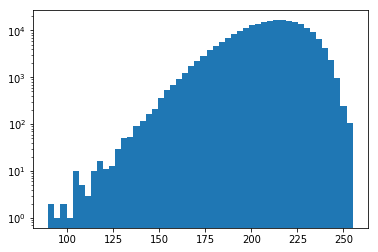

In [35]:
# Load Kuzushiji-49 and bin characters by mean grey level
imgs_train = np.load('input/k49-train-imgs.npz')['arr_0']
means = (255 - imgs_train).mean(axis=1).mean(axis=1)
plt.hist(means, bins=50, log=True)

from collections import defaultdict
character_bins = defaultdict(list)
for char, mean in zip(imgs_train, means):
    character_bins[int(mean)].append(char)

/home/deeplearn/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


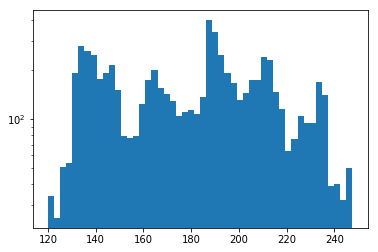

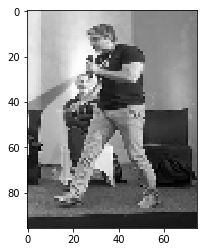

In [36]:
# Note this is multiplied by 28x28 since each pixel is replaced by a character
OUTPUT_RESOLUTION = (96, 75) 
# Rescale pixels to (120, 245) since K49 doesn't have characters with lower gray levels

img_small = (resize(img, OUTPUT_RESOLUTION, preserve_range=True) / 2) + 120 
plt.hist(img_small.flatten(), bins=50, log=True)
plt.show()
plt.imshow(img_small, cmap='gray')
None

In [37]:
new_img = np.zeros((img_small.shape[0]*28, img_small.shape[1]*28), dtype=np.uint8)

In [38]:
# Loop over all pixels in original image, selecting a random character from K49 with same gray level, 
# and putting that character in the same position in the new image
ix = 0
iy = 0
for iy in range(img_small.shape[0]):
    for ix in range(img_small.shape[1]):
        level = int(img_small[iy, ix])
        charbin = character_bins[level]
        if len(charbin) == 0:
            charbin = character_bins[level + 1]
        if len(charbin) == 0:
            charbin = character_bins[level - 1]
        char = 255 - charbin[np.random.choice(np.arange(len(charbin)))]
        new_img[iy*28:(iy+1)*28, ix*28:(ix+1)*28] = char

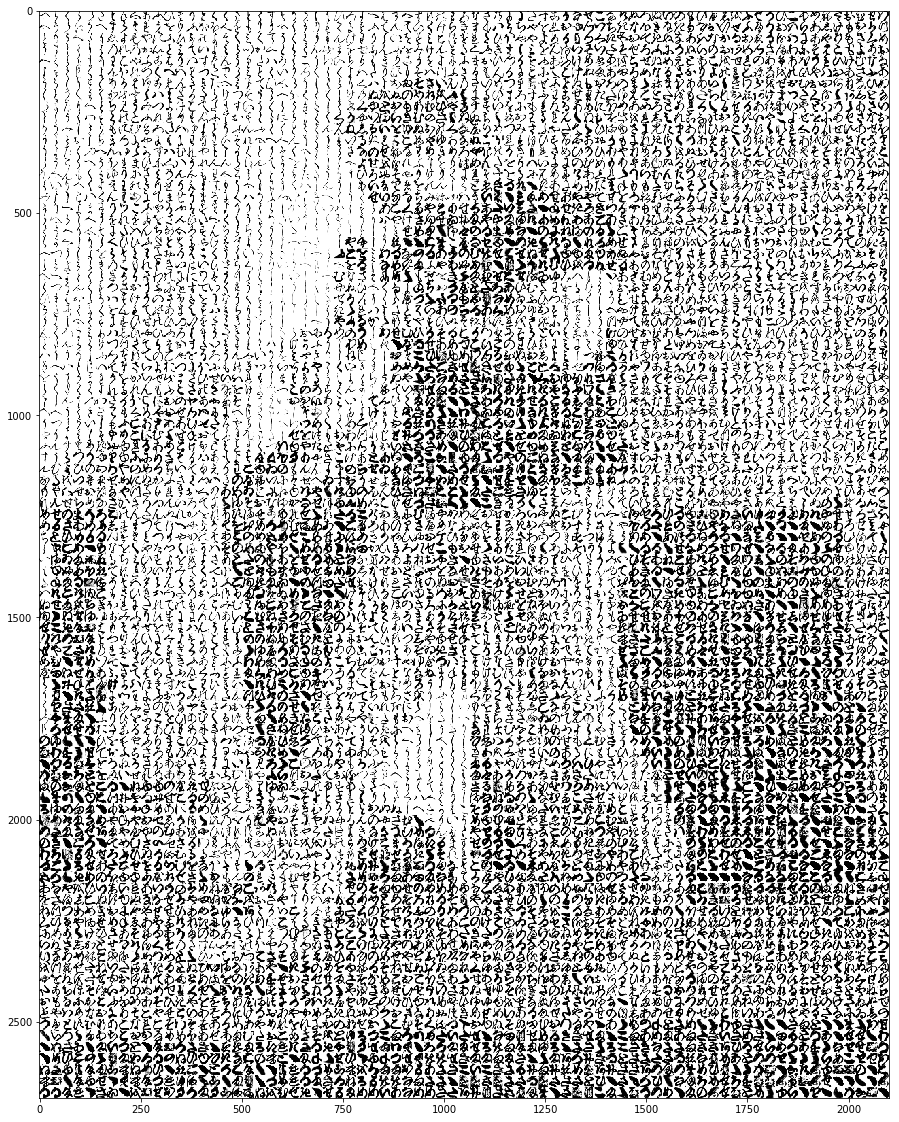

In [39]:
plt.figure(figsize=(20, 20))
plt.imshow(new_img, cmap='gray')

In [40]:
imsave('tarry2.png', new_img)